In [1]:
import torch
import numpy as np
import gensim
from utils import RNN, evaluate, get_embedding_matrix, CustomDataset
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import json
import matplotlib.pyplot as plt

In [2]:
def get_emb(embedding):
    if embedding == "word2vec":
        model = "Embeddings/GoogleNews-vectors-negative300.bin.gz"
        embedding_model = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
    elif embedding == "glove":
        model = "Embeddings/glove.42B.300d.bin.gz"
        embedding_model = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
    else:
        model = "Embeddings/cc.en.300.bin.gz"
        embedding_model = gensim.models.fasttext.load_facebook_model(model).wv
    return embedding_model

In [3]:
def load_model(task: int, model_num, emb_model,emb_name: str):
    filename = f"Models/t{task}_{model_num}_{emb_name}.pt"
    emb_matrix = get_embedding_matrix(emb_model)
    model = RNN(input_size = 300, hidden_size = 128, output_size = 27 if task == 1 else 3,
                        embedding_matrix = emb_matrix, num_layers = 2)
    model.load_state_dict(torch.load(filename))
    model.eval()
    return model

def get_label_encoder(task: int):
    dataset = 'ATE' if task == 2 else 'NER'
    filename = f'Datasets/preprocessed/{dataset}/{dataset}_train.json'
    json_file = json.load(open(filename))
    labels = set()
    for data in json_file.values():
        labels.update(data["labels"])
    encoder = LabelEncoder()
    encoder.fit(sorted(labels))
    return encoder

def get_data(task: int,emb_name):
    dataset = 'ATE' if task == 2 else 'NER'
    filename = f'Datasets/preprocessed/{dataset}/{dataset}_test.json'
    json_file = json.load(open(filename))
    data = [],[]
    for entry in json_file.values():
        data[0].append(entry["text"].split())
        data[1].append(entry["labels"])
    dataset = CustomDataset(data[0], data[1],get_label_encoder(task),get_emb(emb_name))
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)
    return dataloader,dataset

In [4]:
#rnn word2vec data1
test_loader, test_set = get_data(1,'word2vec')
model = load_model(1,"rnn",test_set.embedding,'word2vec')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

C:\Users\gopal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.14005
Accuracy: 0.91892, Precision: 0.60945, Recall: 0.41873, F1-Score: 0.46467


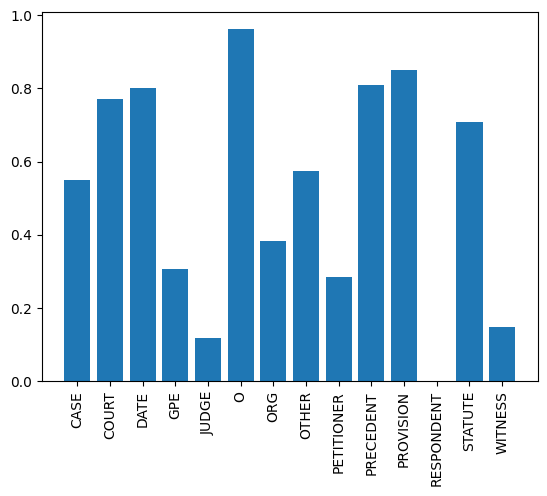

In [5]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

In [6]:
#word2vec rnn 2
test_loader, test_set = get_data(2,'word2vec')
model = load_model(2,"rnn",test_set.embedding,'word2vec')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.05093
Accuracy: 0.92419, Precision: 0.78141, Recall: 0.75905, F1-Score: 0.76870


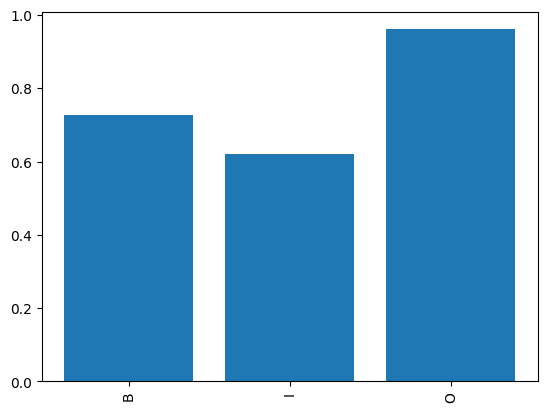

In [7]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

In [8]:
#rnn glove data1
test_loader, test_set = get_data(1,'glove')
model = load_model(1,"rnn",test_set.embedding,'glove')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

C:\Users\gopal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.18932
Accuracy: 0.89380, Precision: 0.38079, Recall: 0.29079, F1-Score: 0.30806


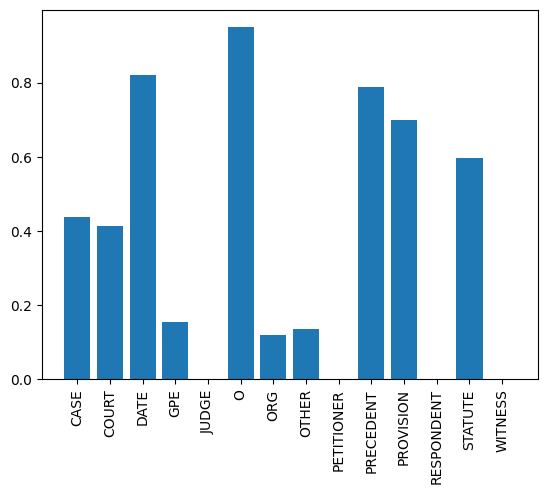

In [9]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

In [10]:
#rnn glove 2
test_loader, test_set = get_data(2,'glove')
model = load_model(2,"rnn",test_set.embedding,'glove')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.06432
Accuracy: 0.90439, Precision: 0.81774, Recall: 0.59848, F1-Score: 0.66939


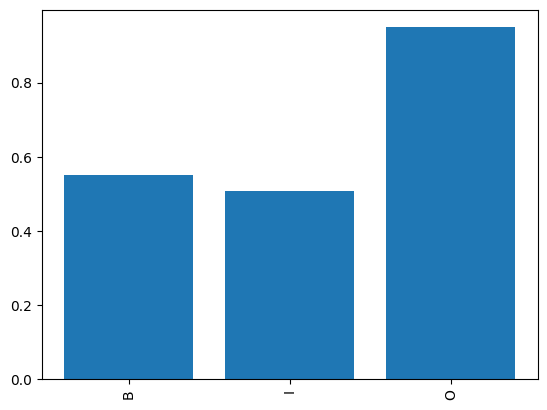

In [11]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

In [12]:
#rnn fasttext 1
test_loader, test_set = get_data(1,'fasttext')
model = load_model(1,"rnn",test_set.embedding,'fasttext')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

C:\Users\gopal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.13176
Accuracy: 0.92982, Precision: 0.54537, Recall: 0.44642, F1-Score: 0.47105


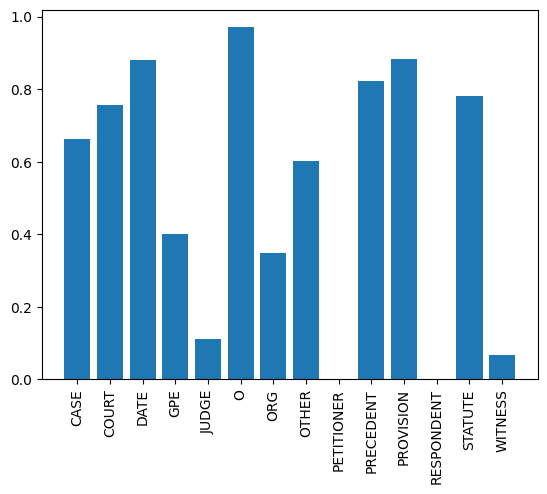

In [13]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

In [4]:
#rnn fasttext 2
test_loader, test_set = get_data(2,'fasttext')
model = load_model(2,"rnn",test_set.embedding,'fasttext')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.05321
Accuracy: 0.91637, Precision: 0.85179, Recall: 0.66836, F1-Score: 0.73627


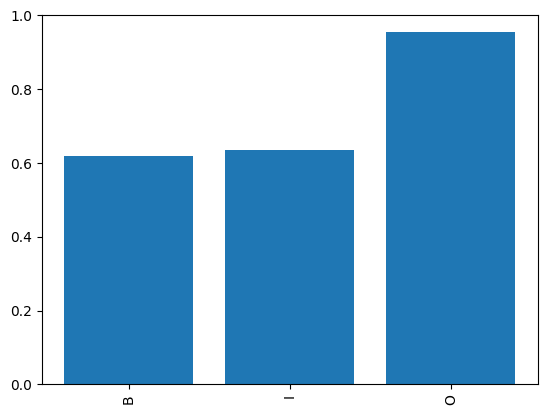

In [5]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()